# Exam 17th of January 2025, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [114]:
# Insert your anonymous exam ID as a string in the variable below
examID="0026-UKA"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.

In [115]:
# Part 1: 4 points
import pandas as pd
import numpy as np
# Load the data from the file data/SVD.csv and store the data in a numpy array called problem1_data below
# Double check that the numbers have been parsed correctly by checking the dtype of the array by calling problem1_data.dtype
problem1_data = np.array(pd.read_csv('data/SVD.csv', encoding='latin1'))
problem1_data.dtype
print(problem1_data.shape) # shape is 1009 x 100
# A numpy array of shape n_samples x n_dimensions
#problem1_data.T # Transpose to be able to take [0]

np.linalg.svd
U, s, V = np.linalg.svd(problem1_data, full_matrices=False) # Calculate SVD
problem1_U = U # The matrix of left singular vectors of problem1_data with shape n_samples x n_dimensions
problem1_D = s # The vector of singular values of problem1_data with shape n_dimensions
problem1_V = V # The matrix of right singular vectors of problem1_data with shape n_dimensions x n_dimensions


problem1_first_right_singular_vector = V[0] # The first right singular vector of problem1_data with shape (n_dimensions,) hint sometimes one needs to invoke flatten() to avoid having shape (n_dimensions, 1) or (1, n_dimensions)

problem1_first_left_singular_vector = U[0] # The first left singular vector of problem1_data with shape (n_samples,) hint sometimes one needs to invoke flatten() to avoid having shape (n_samples, 1) or (1, n_samples)

print(s.shape)
print(f"U.shape {U.shape}")
print(f"V.shape {V.shape}")
print(f"V0.shape {V[0].shape}")
print(f"U0.shape {U[0].shape}")

(1009, 100)
(100,)
U.shape (1009, 100)
V.shape (100, 100)
V0.shape (100,)
U0.shape (100,)


In [116]:
# Part 2: 3 points

# Calculate the explained variance of using 1,2,3,...,n_dimensions singular values and store it as a numpy array called
#  problem1_explained_variance below
# A numpy array of shape (n_dimensions,), it should be an increasing sequence of positive numbers and the last element should be 1

# According to lecture notes, Explained variance is how much percentage of the total variance is captured
#by our singular vectors. Remember the interpretation of the singular values
#as the standard deviation, as such the variance explained of the first k
#omponents is just the sum of the singular values squared and divided by
#the total variance.



variances = s**2 / (problem1_data.shape[0]-1)
explained_variances = variances / np.sum(variances)

acc_list = []
acc = 0
for vars in explained_variances:
    acc += vars
    acc_list.append(acc)
    

problem1_explained_variance = np.array(acc_list)
#print(problem1_explained_variance)
# Store in the variable below the smallest number of singular values needed to explain at least 95% of the variance

# Z score is often 1.96 for 95% conf interval. 
mean_std = np.mean(s)
#print(mean_std)
# I assume error marginal 10
# From formula E = Z * std / sqrt(n) i rewrite and get the following
# n = ((z + std) / E)**2

print(((1.96 * mean_std)/10)**2) # Prints about 38.75. Which I round up to 39, because the num of vectors is discrete and not continuous.
problem1_num_components = 39
print(problem1_num_components)

38.75331584600967
39


In [117]:
# Part 3: 3 points
import scipy
# Calculate the approximating matrix of problem1_data using the first 
# problem1_num_components singular values and store it in the variable below
new_s = scipy.linalg.diagsvd(s[0:problem1_num_components], 39, 39) # I read that it should be diagonalized on wikipedia
print(f"shape of new s: {new_s.shape}")
print(len(new_s)) # len 39, but to multiply it with U and V it must have matching dimensions. 
# I need to truncate both U and V accordingly. so they are correct dimensions
U_truncated = problem1_U[:][:1009]
U_truncated = problem1_U[0:1009,0:39]
print(U_truncated.shape) # 
u_times_s = np.matmul(U_truncated, new_s)
print(problem1_V.shape)
V_truncated = problem1_V[:39][:]
print(V_truncated.shape)

# here i multiply U * s * V, but they are truncated to M x 39, 39x39, and 39 x 100. 
problem1_approximation = np.matmul(np.matmul(U_truncated, new_s), V_truncated) # A numpy array of shape n_samples x n_dimensions

shape of new s: (39, 39)
39
(1009, 39)
(100, 100)
(39, 100)



## Free text answer

Put the explanation for **part 3** of the rows of the approximating matrix below this line in this cell. In order to enter edit mode you can doubleclick this cell or select it and just press enter.

I looked at wikipedia and old posts stack overflow to solve the problem. What does each row represent in the matrix? Each row represents the results of a multiplication between right and left singular vector values with singular values.

2.7589579e-13
(10, 100)
[[ 1.60971035e+00  1.55427019e+00 -2.88713487e+00 -9.06081119e-01
   1.35064386e+00  1.77278418e-01 -2.99414485e-01 -5.46813203e-01
  -2.51765426e+00  8.01275190e-02  3.33713130e-01 -2.00376583e+00
  -2.50856848e+00 -1.09032399e+00 -1.79143280e+00 -1.15187960e+00
  -6.71121583e-02  2.07853318e+00 -1.15728093e+00 -1.88994959e+00
  -5.52768681e-01 -6.46537632e-01 -1.68159410e-01 -1.64327124e+00
   3.44360451e+00  1.57465487e+00  3.06821778e+00  1.20527102e-01
  -4.14048312e-01 -2.70404810e+00 -3.23870516e+00 -3.89862089e-01
  -2.81804401e+00 -3.17899690e-01  1.56144003e+00 -5.79931998e-01
   1.86893928e+00  1.49325650e+00  1.25275742e+00 -4.75247635e-01
   1.52963594e+00 -7.85947554e-01 -5.61636237e-01 -1.48468906e+00
  -1.63226886e+00  2.90365969e+00 -1.63187956e+00  1.17608707e+00
   3.42668132e+00  9.50720226e-02  1.05629884e+00  4.58561870e-01
   4.72833603e-01  3.48179278e-01  1.42279829e+00 -3.44919925e+00
   2.42036638e-01  1.08565991e+00 -1.84973179e+00 -3

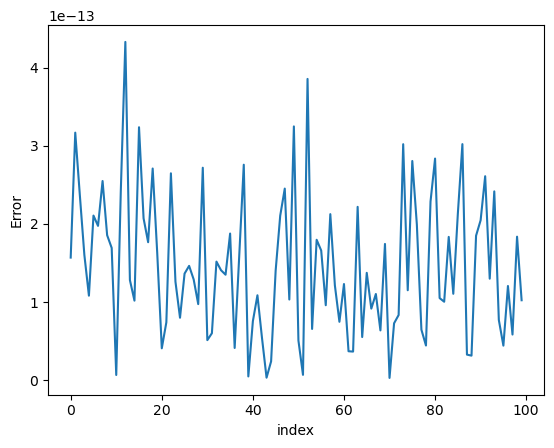

In [118]:
# Part 4: 4 points
from Utils import plotEDF
# Calculate the reconstruction error of problem1_data using problem1_approximation and 
# store it in the variable below (should have shape (n_samples,)) (row wise Euclidean distance)
diffs_matrix = np.sqrt((sum(problem1_data - problem1_approximation))**2)
problem1_reconstruction_error = np.array(diffs_matrix)

# Put the code below to plot the empirical distribution function of the reconstruction error
# XXX
# XXX
# XXX
# I saw that there was a function for plotting empirical distribution function in Utils, so I used that one!
import matplotlib.pyplot as plt

plt.ylabel("Error")# Y is error, X is index  
plt.xlabel("index")
plt.plot(problem1_reconstruction_error)

# I need to find 10 biggest elements in the reconstruction error. I do that below.
big10 = np.sort(problem1_reconstruction_error)
#print(big10)
len(big10)
#print("LENGTH")
big10 = big10[90:100]
#print(f"BIGGEST 10: {big10}")
len(big10)
# Since the 10th biggest is 2.75895792e-13, i take 2.75895790e-13 as thershold

# Store the value of the selected threshold in the variable below
problem1_threshold = 2.75895790e-13
print(problem1_threshold) 
# Finally store the samples of problem1_data that have a reconstruction 
# error larger than problem1_threshold in the variable below, should have shape (10, n_dimensions)
i = 0
bigger = 0
problem1_outliers = []
for elem in problem1_reconstruction_error:
    #print(f"elem: {elem}")
    if elem > problem1_threshold:
        problem1_outliers.append(problem1_data[i])
        #print(f"This is the indexed value: {problem1_data[i]}")
        bigger +=1
        #print(f"BIGGER: {bigger}")
    i+=1
problem1_outliers = np.array(problem1_outliers)
print(problem1_outliers.shape)
print(problem1_outliers)

---
## Exam vB, PROBLEM 2
Maximum Points = 14


In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
2. [4p] A page loads in $\text{Exp}(1)$ (Exponentially distributed with mean $1$) seconds if not preloaded and loads with $\text{Exp}(10)$ (Exponentially distributed with mean $1/10$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $1$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to it. 

In [119]:
# Part 1: 3 points

# Load the data from the file data/websites.csv and estimate the transition matrix of the Markov chain
# Store the estimated transition matrix in the variable problem2_transition_matrix below

data = pd.read_csv('data/websites.csv', encoding='latin1')
print(data.shape)
#data = data.pop("user") # drop user because we don't care about user, only transitions
data = data.drop(data.columns[0], axis=1)
print(data.shape)
data = np.array(data)


# from a lesson
def transition_matrix(chain_seq):
    # define number of states
    n = 10
    # create an empty nXn matrix, which we will fill in
    M = np.zeros((n,n))
    # zip is a useful method for working with matrices
    # for each states, we add up to a matrix whenever we find this state in the sequence 
    for (i,j) in zip(chain_seq,chain_seq[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    M = M/M.sum(axis=1, keepdims=True)
    return M

i = 0
new_data = []
users_array = []
for row in data:
    if i%10 == 0 and i != 0:
        new_data.append(users_array)
        users_array = []
        i+=1
    else:
        users_array.append(row[0])
        users_array.append(row[1])
        i+=1

new_data = np.array(new_data)
#print(new_data.shape)
#print("length")
print(len(new_data))
print(type(new_data))


transmat = 0
for user in new_data:
    transmat += transition_matrix(user)
transmat = transmat / 100 # We average the transition matrices of all users!

print(transmat.shape)


# Í made a separate trans matrix for each user and then averaged them together. For some reason the matrix
# is just filled with nan, nan, nan, .....

problem2_transition_matrix = transmat 
# A numpy array of shape (problem2_n_states, problem2_n_states)

print(problem2_transition_matrix)
# Store the number of states in the variable problem2_n_states below
problem2_n_states = 10 # Should be 10, because we have 10 different destinations (as well as sources).


(999, 3)
(999, 2)
99
<class 'numpy.ndarray'>
(10, 10)
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]


C:\Users\ang-tenta\AppData\Local\Temp\ipykernel_40384\222273399.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data = np.array(new_data)
C:\Users\ang-tenta\AppData\Local\Temp\ipykernel_40384\222273399.py:26: RuntimeWarning: invalid value encountered in divide
  M = M/M.sum(axis=1, keepdims=True)


In [120]:
# Part 2: 4 points

# Simulate the website load times for the next page of 10000 users that are currently on page 1 (recall indexing starts at 0) when we only load the most likely page.
# Store the simulated page load times in the variable problem2_page_load_times_top below
problem2_page_load_times_top = 1#XXX # A numpy array of shape (10000,)


# Repeat the simulation of load times for the next page of 10000 users that are currently on page 1 when we load the two most likely pages.
# Store the simulated page load times in the variable problem2_page_load_times_two below
problem2_page_load_times_two = 1#XXX # A numpy array of shape (10000,)


In [121]:
# Part 3: 3 points

# Calculate the true expected load time for loading a page without pre-loading the next page and store it in the variable below
problem2_avg = 0.5#XXX # A float

# Is the average load time for loading a page without pre-loading the next page larger than the average load time for loading a page after pre-loading the next most likely page?
problem2_comparison = True #XXX # True / False



## Free text answer

Put the explanation for **part 3** of how you made the decision about `problem2_comparison` below this line in this **cell**. In order to enter edit mode you can doubleclick this cell or select it and press enter.



In [122]:
# Part 4: 4 points

# Begin by calculating the stationary distribution of the Markov chain and store it in the variable below
# WARNING: Since the transition matrix is not symmetric, numpy might make the output of the eigenvectors complex, you can use np.real() to get the real part of the eigenvectors
# Store the stationary distribution in the variable below called problem2_stationary_distribution

def get_stationary_distribution(transition_matrix):

    # transpose the matrix
    transition_matrix_t = transition_matrix.T
    # use linear algebra module of numpy to compute the eigenvalues
    eigenvals, eigenvects = np.linalg.eig(transition_matrix_t)

    # Find the indexes of the eigenvalues that are close to one.
    close_to_1_idx = np.isclose(eigenvals,1) # isclose checks element-wise if each element is close to 1 within the specific tolerance
    # Use them to select the target eigen vectors
    target_eigenvect = eigenvects[:,close_to_1_idx]
    #Flatten
    target_eigenvect = target_eigenvect[:,0]
    # Turn the eigenvector elements into probabilities
    # that would be the stationary distribution
    st_d = target_eigenvect / sum(target_eigenvect) 
    
    real_st_distr = st_d.real
    
    ## check
    if st_d.real.sum() != 1:
        raise Exception("The probabilities don't sum to 1!")
        
    return real_st_distr


problem2_stationary_distribution = 0 # get_stationary_distribution(transmat) 
# A numpy array of shape (problem2_n_states,)
# Not working because my transition matrix contains nan


# Now use the above stationary distribution to calculate the average load time for loading a page after pre-loading the next most likely page according to the stationary distribution
# Store the average load time in the variable below
problem2_avg_stationary = 0.5 # XXX # A float

---
## Exam vB, PROBLEM 3
Maximum Points = 12


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
3. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

In [123]:

# RUN THIS CELL TO GET THE DATA

# We start by loading the data

import pandas as pd

PROBLEM3_DF = pd.read_csv('data/fraud.csv')
Y = PROBLEM3_DF['Class'].values
X = PROBLEM3_DF[['V%d' % i for i in range(1,5)]+['Amount']].values

# We will split the data into training, testing and validation sets
from Utils import train_test_validation
PROBLEM3_X_train, PROBLEM3_X_test, PROBLEM3_X_val, PROBLEM3_y_train, PROBLEM3_y_test, PROBLEM3_y_val = train_test_validation(X,Y,shuffle=True,random_state=1)

# From this we will train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(PROBLEM3_X_train,PROBLEM3_y_train)

# THE FOLLOWING CODE WILL PRODUCE THE ARRAYS YOU NEED FOR THE PROBLEM

PROBLEM3_y_pred_proba_val = lr.predict_proba(PROBLEM3_X_val)[:,1]
PROBLEM3_y_true_val = PROBLEM3_y_val

PROBLEM3_y_pred_proba_test = lr.predict_proba(PROBLEM3_X_test)[:,1]
PROBLEM3_y_true_test = PROBLEM3_y_test

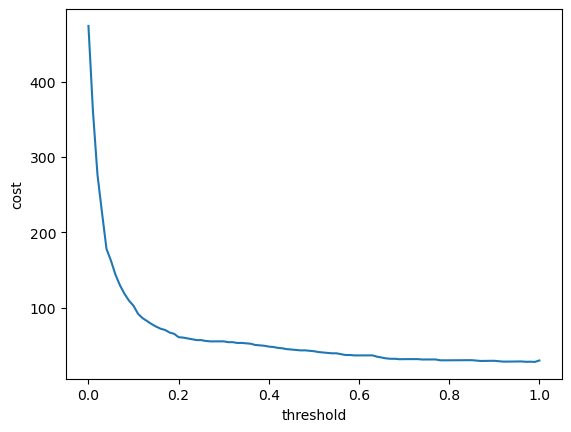

In [124]:

# Part 1: 3 points
# Implement the following function that calculates the cost of a binary classifier according to
# the specification in the problem statement
# See the comments inside the function for details of the parameters
def cost(y_true,y_predict_proba,threshold):
    # y_true is a numpy array of shape (n_samples,) with binary labels
    # y_predict_proba is a numpy array of shape (n_samples,) with predicted probabilities
    # threshold is a float between 0 and 1

    # When returning the cost, you should return the average cost per sample
    # thus it should be a value
    
    

    #print(y_pred_proba1.shape)
    predictions = (y_predict_proba >= threshold).astype(int)
    
    # If predicted false and is true, 120
    pft = (1 - predictions) * y_true * 120
    # If predicted true and is false, 600
    ptf = (1 - y_true) * predictions * 600
    # if predicted false and is false, 0
    pff = (1 - predictions) * (1 - y_true) * 0 # no cost
    # if predicted true and is true, 100
    ptt = predictions * y_true * 100
    cost_avg = np.mean(pft + ptf + pff + ptt) # Average the cost

    return cost_avg # A float


# Provide the code below to plot the cost as a function of the threshold
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# The plot should be between 0 and 1 with 0.01 increments
# The y-axis should be the cost and the x-axis should be the threshold



thresholds = np.linspace(0, 1, 101)  # Generate 101 thresholds from 0 to 1

costs = [cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t) for t in thresholds]

import matplotlib.pyplot as plt

plt.ylabel("cost")
plt.xlabel("threshold")
plt.plot(thresholds, costs)



In [125]:
# Part 2: 2.5 points

# Use the cost function you just implemented above to find the threshold that minimizes the cost
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the threshold in the variable below

thresholds = np.linspace(0, 1, 101)  # Generate 101 thresholds from 0 to 1
# Like the instructions said, I use prob3 true val and prob3 ypred proba val.
costs = [cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t) for t in thresholds]

optimal_threshold = thresholds[np.argmin(costs)]
cost_at_optimal_threshold = min(costs)

print(f"Optimal threshold: {optimal_threshold}")
#print(f"Cost at optimal threshold: {cost_at_optimal_threshold}")

problem3_threshold = 0.99 # A float between 0 and 1

# Now calculate the cost of the classifier using the validation data and the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the cost in the variable below
problem3_cost_val = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, 0.99) # A float
print(f"my optimal cost on val: {problem3_cost_val}")
# Using the threshold you just found, calculate the predicted labels of the classifier 
# on the validation data
# put the predicted labels in the variable below

# obviously, where the predict proba value is equal to or bigger than threshold, we predict as true (1), else we predict false (0)
problem3_y_pred_val = (PROBLEM3_y_pred_proba_val >= problem3_threshold).astype(int) # A numpy array of shape (n_samples,) with values 0 or 1
#print(problem3_y_pred_val)

# Calculate the precision and recall of the classifier of class 1 using the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

problem3_precision_1 = precision_score(PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=1) # A float between 0 and 1
problem3_recall_1 = recall_score(PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=1) # A float between 0 and 1

# Calculate the precision and recall of the classifier of class 0 using the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.

problem3_precision_0 = precision_score(PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=0) # A float between 0 and 1
problem3_recall_0 = recall_score(PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=0) # A float between 0 and 1
print(problem3_precision_0, problem3_precision_1, problem3_recall_0, problem3_recall_1)


Optimal threshold: 0.99
my optimal cost on val: 28.413145539906104
0.8520900321543409 0.9924242424242424 0.9987437185929648 0.48698884758364314


In [126]:
# Part 3: 2.5 points

# Find the threshold that minimizes the $0-1$ loss using the validation data
# specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the threshold in the variable below
#from sklearn.metrics import zero_one_loss
#sklearn.metrics.zero_one_loss(y_true, y_pred, *, normalize=True, sample_weight=None#


thresholds = np.linspace(0, 1, 101)  # Generate 101 thresholds from 0 to 1
# Like the instructions said, I use prob3 true val and prob3 ypred proba val.


# zero one loss, from what i've read, is just a loss function that penalizez missclassificaitons with 1 and
# correct classifications with 0.
def zoloss(y_true,y_predict_proba,threshold):
    # y_true is a numpy array of shape (n_samples,) with binary labels
    # y_predict_proba is a numpy array of shape (n_samples,) with predicted probabilities
    # threshold is a float between 0 and 1

    # When returning the cost, you should return the average cost per sample
    # thus it should be a value
    
    

    #print(y_pred_proba1.shape)
    predictions = (y_predict_proba >= threshold).astype(int)
    
    # If predicted false and is true, 120
    pft = (1 - predictions) * y_true
    # If predicted true and is false, 600
    ptf = (1 - y_true) * predictions
    # if predicted false and is false, 0
    pff = (1 - predictions) * (1 - y_true) * 0 # no cost
    # if predicted true and is true, 100
    ptt = predictions * y_true * 0
    cost_avg = np.mean(pft + ptf + pff + ptt) # Average the cost

    return cost_avg # A float

costs = [zoloss(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t) for t in thresholds]

optimal_threshold = thresholds[np.argmin(costs)]
cost_at_optimal_threshold = min(costs)

print(f"Optimal threshold: {optimal_threshold}")

#loss01 = zero_one_loss(PROBLEM3_y_true_val, problem3_y_pred_val)
#print(loss01) # prints 0.1305164319248826

problem3_threshold_01 = 0.6900000000000001 # A float between 0 and 1. Its 0.6900000000000001

# Now calculate the difference in cost (using the cost function you implemented in step 1) 
# between the optimal one chosen in part 2 and the one chosen in part 3 by taking the
#  cost with the threshold found in part 3 and subtracting the cost with the 
# threshold found in part 2 to get a positive value
problem3_cost_difference = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, 0.6900000000000001) - cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, 0.99)# A float

print(f"Diff: {problem3_cost_difference}")


Optimal threshold: 0.6900000000000001
Diff: 3.586854460093896


In [127]:
# Part 4: 4 points

# Using the threshold problem3_threshold use Hoeffdings inequality to provide a confidence interval 
# for the cost of the classifier with 95 % confidence using the test data.
# Specifically the arrays PROBLEM3_y_true_test and PROBLEM3_y_pred_proba_test.
# Store the lower and upper bounds of the confidence interval in the variables below


print(problem3_threshold)
cost_range = 600 # since cost ranges from 0 to 600, we must multiply epsilon by that range
epsilon = np.sqrt(np.log(2/0.05) / (2 * len(PROBLEM3_y_true_test))) * cost_range

mean = cost(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold)

problem3_lower_bound = mean - epsilon # A float
problem3_upper_bound = mean + epsilon # A float

print(problem3_lower_bound, problem3_upper_bound)

0.99
3.744182034439273 53.68304801250909



## Free text answer

Put your explanation for part 4 below this line in this **cell**. Doubleclick to enter edit mode as before.


I assume that all variables are sub-Gaussian, to be able to use Hoeffdinger's inequality. 
I furthermore assume that the variables X are IID.